In [1]:
import os
import sys
# 現在のノートブック位置: notebooks/demo
# プロジェクトルートは notebooks/demo/ から 2階層上: "../.."
PROJECT_ROOT = os.path.abspath(os.path.join("..", ".."))

# Python のモジュール検索パスに追加
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

print("PROJECT_ROOT:", PROJECT_ROOT)
print("sys.path:", sys.path)

PROJECT_ROOT: /Users/norikikomori/Desktop/img_rec
sys.path: ['/Users/norikikomori/Desktop/img_rec/notebooks/demo', '/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '', '/opt/anaconda3/lib/python3.12/site-packages', '/opt/anaconda3/lib/python3.12/site-packages/aeosa', '/opt/anaconda3/lib/python3.12/site-packages/setuptools/_vendor', '/Users/norikikomori/Desktop/img_rec']


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from src.dataset.process import load_npz_file, load_npz_signal, target_image, collected_signal
from src.dataset.speckle_pred import speckle_pred_inv
from src.utils.inv_recon import img_reconstruction
from src.trainer import train_simple
file_y = "Rand+Mnist+Rand_pix28x28_image(1500+10+1500)x2_sig2500x4wave.npz"
file_x = "Rand+Mnist+Rand_size28x28_image(1500+10+1500)x2.npz"

In [3]:
recon_list = train_simple(file_y, file_x, select="both")

Using device: mps
Y_mnist shape: (10, 10000)
Y_random shape: (3000, 10000)
X_mnist shape: (10, 784)
X_random shape: (3000, 784)
X_mnist min, max: -1.0 1.0
X_random min, max: -1.0 1.0
ランダムパターンからspeckle_patternsを推定します。pinvを利用します。
speckle by random: -0.003202622393961231 0.0005496612589188887 (784, 10000)

================ Image 0 の学習開始 ================

torch.Size([10000])
Image 0, Epoch [500/10000], Loss: 0.00003508146619
再構成画像の shape: torch.Size([784])
Image 0, Epoch [1000/10000], Loss: 0.00001746675298
再構成画像の shape: torch.Size([784])
Image 0, Epoch [1500/10000], Loss: 0.00000949855075
再構成画像の shape: torch.Size([784])
Image 0, Epoch [2000/10000], Loss: 0.00000710470704
再構成画像の shape: torch.Size([784])
Image 0, Epoch [2500/10000], Loss: 0.00000610992583
再構成画像の shape: torch.Size([784])
Image 0, Epoch [3000/10000], Loss: 0.00000561601701
再構成画像の shape: torch.Size([784])
Image 0, Epoch [3500/10000], Loss: 0.00000534416358
再構成画像の shape: torch.Size([784])
Image 0, Epoch [4000/10000], Loss: 0.00

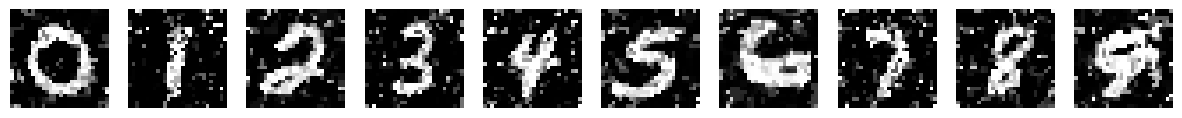

In [4]:
fig, axes = plt.subplots(1, 10, figsize=(15, 2))  # 1行10列でサブプロットを作成
for i in range(10):
    img = recon_list[i].reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')  # 軸を非表示にする
plt.show()